# Políticos en Twitter
## *Alberto Barradas*
[@abcsds](https://twitter.com/abcsds)

Como sabrán, twitter es un método de interacción entre individuos, instituciones, y figuras públicas. Es común para una figura pública tener una cuenta de twitter. En esta ocasión obtendremos los datos de un político de interés con ayuda de twitter.

Por ahora obtendremos de manera manual el usuario de tweeter.

Para ésto haremos uso de [Representantes Patito](http://representantes.pati.to/), sitio que nos ayuda a encontrar nuestros representantes políticos de acuerdo a nuestra dirección de residencia. 

Despues de colocar el pin en posisión y dar click a `Aquí vivo`. obtendremos una lista de lo representantes locales.

Al selecionar a alguno de ellos obtendremos más información de ellos, incluyendo un link a su cuenta de tweeter. Por ahora tomemos el usuario de forma manual.

En mi caso, he seleccionado a Miguel Ángel Chico H. **`@MiguelChicoOfl`**

Usaremos la librería [Tweepy](http://docs.tweepy.org/) para acceder a la información deseada.

In [1]:
import tweepy

Para acceder a twiter es necesario tener llaves de la api; se consiguen [aquí](https://apps.twitter.com). 
Para importarlas de la siguiente forma crea un archivo llamado `myKeys.py`.

In [2]:
import myKeys

api_key = myKeys.api_key
api_secret = myKeys.api_secret
access_token_key = myKeys.access_token_key
access_token_secret = myKeys.access_token_secret

Ahora accedemos con las credenciales a la API

In [3]:
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token_key, access_token_secret)
api = tweepy.API(auth)

Por ultimo solo mandamos llamar la función `user_timeline()` con el usuario que obtuvimos antes. 

In [4]:
# user = api.get_user()
tweets = api.user_timeline(screen_name="MiguelChicoOfl", count=20000)

Listo! los tweets ya están ahí. Ahora solo hay que imprimirlos.

In [5]:
for tweet in tweets:
    print tweet.text

RT @Jen_m6: Imagen de hoy por la madrugada en el Parque Hidalgo @BajioTv https://t.co/WparOLCAcX
RT @PresidenciaMX: Así se vivió la conmemoración del 210º Aniversario del Natalicio de Don #BenitoJuárez. https://t.co/P8iA5A8TYS https://t…
RT @JMRJaral: Una gota de agua es poderosa.Una gota de agua es más necesaria que nunca. @MiguelChicoOfl 
#DiaMundialAgua https://t.co/k3DVO…
#GuanajuatoesPrimero!, comparto vídeo de #Guanajuato
#UniversidaddeGuanajuato
@ig_guanajuato
Vídeo:@c13studio https://t.co/bmsABDZTil
Efeméride:22/03/1776,muere en Sn Miguel de Allende Luis Felipe Neri de Alfaro,fue fundador Santuario de Atotonilco https://t.co/6PgEhnJdXZ
RT @JMRJaral: Benito Pablo Juárez García  el «Benemérito de las Américas» https://t.co/wrqDIiCA0c
RT @PeriodistaAle: La magia de mí pueblo @Yuriria , laguna, bosque, gente que sabe su historia. #ViveloParaCreerlo. @QuiqueRivera https://t…
RT @clubleonfc: Tras cumplir 11 fechas en la @LIGABancomerMX, esta es nuestra ubicación en la tabla general d

## Análisis

Ahora que tenemos ésta información hagamos un análisis exploratorio. Para ésto usaremos nuestras herramientas comunes, y `Textblob`, para el análisis de texto.

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Para quien esté familiarizado con la estructura de un tweet las opicones son muchas a partir de éste paso. Para quien no, ver los métodos internos del objeto en python es una forma de empezar:

In [7]:
for i in dir(tweets[0]):
    print i

__class__
__delattr__
__dict__
__doc__
__eq__
__format__
__getattribute__
__getstate__
__hash__
__init__
__module__
__ne__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__str__
__subclasshook__
__weakref__
_api
_json
author
contributors
coordinates
created_at
destroy
entities
extended_entities
favorite
favorite_count
favorited
geo
id
id_str
in_reply_to_screen_name
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
is_quote_status
lang
parse
parse_list
place
possibly_sensitive
retweet
retweet_count
retweeted
retweeted_status
retweets
source
source_url
text
truncated
user


Un dato muy importante para el análisis es la fecha y hora de creación. Ésta nos permite hacer una linea del tiempo.

In [8]:
for tweet in tweets:
    print tweet.created_at

2016-03-22 22:48:04
2016-03-22 22:47:30
2016-03-22 19:28:59
2016-03-22 13:52:12
2016-03-22 13:46:30
2016-03-21 18:07:46
2016-03-21 16:49:31
2016-03-21 16:47:11
2016-03-21 13:31:39
2016-03-21 13:30:32
2016-03-21 03:18:41
2016-03-20 17:09:52
2016-03-20 13:14:22
2016-03-20 13:13:53
2016-03-19 20:29:55
2016-03-19 15:16:53
2016-03-19 15:16:23
2016-03-19 13:18:09
2016-03-19 12:57:35
2016-03-19 05:18:15
2016-03-19 04:32:06
2016-03-19 04:27:39
2016-03-19 03:30:00
2016-03-19 03:29:49
2016-03-18 22:26:11
2016-03-18 22:17:24
2016-03-18 21:31:34
2016-03-18 21:28:45
2016-03-18 21:24:41
2016-03-18 21:23:24
2016-03-18 20:29:06
2016-03-18 20:24:43
2016-03-18 20:19:25
2016-03-18 19:26:40
2016-03-18 16:23:37
2016-03-18 16:23:18
2016-03-18 16:23:03
2016-03-18 12:31:51
2016-03-18 12:31:20
2016-03-18 04:30:14
2016-03-18 04:30:09
2016-03-18 04:06:11
2016-03-18 04:06:06
2016-03-18 03:48:53
2016-03-18 03:48:38
2016-03-18 02:59:27
2016-03-18 02:56:32
2016-03-18 02:51:25
2016-03-18 02:51:18
2016-03-18 02:41:35


Un dato que puede ser muy interesante es la geolocalización del tweet:

In [9]:
for tweet in tweets:
    print tweet.geo

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


No en este caso u.u

### Time series
Los tweets son un fenomeno temporas, así que se pueden gráficar como una serie de tiempo. En éste caso la cantidad de caractéres con respecto al tiempo.

In [10]:
ts =  pd.Series([len(tweet.text) for tweet in tweets],index=[tweet.created_at for tweet in tweets])
len(ts.index) # Cantidad de tweets capturados

199

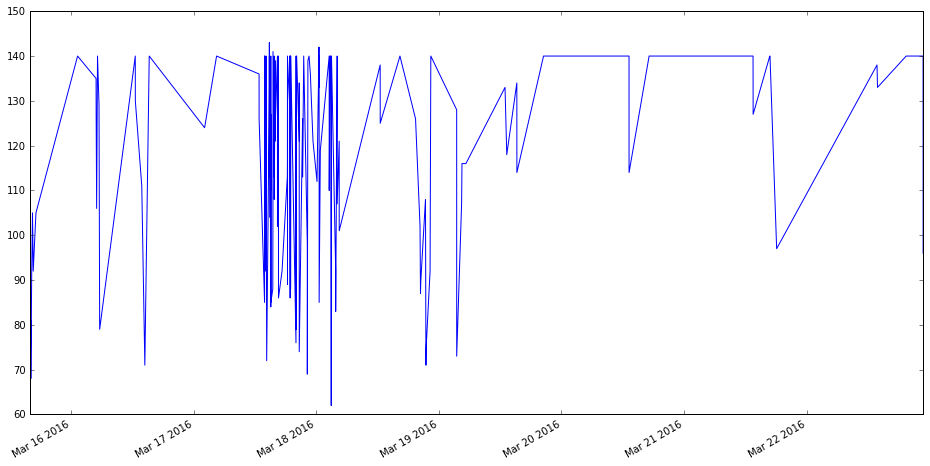

In [11]:
ts.plot(figsize=(16,8)) #area bar scatter

## Análisis de sentimiento
Para éste análisis usaremos el diccionario [SDAL](http://habla.dc.uba.ar/gravano/sdal.php?lang=esp) (Spanish Dictionary of Affect in Language) que puedes encontrar en formáto csv en mi repositorio en [github](https://github.com/abcsds/sdal). Puedes leer más sobre cómo se hizo éste diccionario y cómo usarlo en el reporte official: http://digital.bl.fcen.uba.ar/Download/TechnicalReport/TechnicalReport_00001.pdf 

In [12]:
sdal = pd.read_csv('sdal.csv',sep=';') # https://raw.githubusercontent.com/abcsds/sdal/master/data/sdal.csv

In [13]:
sdal.head()

,Word_O,Pleasantness,Activation,Imagery,Pleasantness_SD,Activation_SD,Imagery_SD
0,población_N,1.8,2.0,2.6,0.4472,0.7071,0.5477
1,obra_N,2.2,2.4,2.4,0.4472,0.5477,0.8944
2,dormir_V,3.0,1.4,3.0,0.0000,0.8944,0.0000
3,dar_V,2.8,3.0,3.0,0.4472,0.0000,0.0000
4,realizar_V,2.6,3.0,2.8,0.5477,0.0000,0.4472


Para su uso práctico crearemos tres columnas nuevas: palabra, objeto e indice de agrado. El indice de agrado indica que tan agradable es cierta palabra. Ya que el valor de pleasantness está dado entre 1 y 3 se le da un offset al valor.

In [14]:
sdal['Word'] = sdal['Word_O'].apply(lambda word: word.split('_')[0])
sdal['Object'] = sdal['Word_O'].apply(lambda word: word.split('_')[1])
sdal['Score'] = sdal['Pleasantness'].apply(lambda score: score-2)

In [15]:
sdal.head()

,Word_O,Pleasantness,Activation,Imagery,Pleasantness_SD,Activation_SD,Imagery_SD,Word,Object,Score
0,población_N,1.8,2.0,2.6,0.4472,0.7071,0.5477,población,N,-0.2
1,obra_N,2.2,2.4,2.4,0.4472,0.5477,0.8944,obra,N,0.2
2,dormir_V,3.0,1.4,3.0,0.0000,0.8944,0.0000,dormir,V,1.0
3,dar_V,2.8,3.0,3.0,0.4472,0.0000,0.0000,dar,V,0.8
4,realizar_V,2.6,3.0,2.8,0.5477,0.0000,0.4472,realizar,V,0.6


Los únicos datos que usaremos el día de hoy serán la palabra y el score normalizado.

In [16]:
dictDF = sdal[['Word','Score']]
dictDF.head()

,Word,Score
0,población,-0.2
1,obra,0.2
2,dormir,1.0
3,dar,0.8
4,realizar,0.6


Para el procesamiento de los tweets es necesario crear un diccionario de python de la siguiente forma:

In [17]:
dictionary = dictDF.set_index('Word')['Score'].to_dict()
for word in dictionary.keys():
    # print type(word),type(word.decode('utf-8')), word, dictionary[word]
    pass


#### **Importante**:
Ya que python 2.7 no maneja unicode por default es necesario forzar las llaves de nuestro diccionario a unicode. Este paso es casi imperceptible pero muy importante.

In [18]:
unicodeDictionary = {}
for word in dictionary.keys():
    try:
        unicodeDictionary[word.decode('utf-8')] = dictionary[word]
    except UnicodeDecodeError:
        print 'Word lost:', word
dictionary = unicodeDictionary

Aquí se muestra el análisis de cada tweet:

In [19]:
sentiments = pd.DataFrame(columns=('Time', 'Score'))

for tweet in tweets:
    score = 0
    line = tweet.text.replace('.','').replace(',','').replace(';','').replace(':','').replace('\t',' ').replace('\n',' ')
    words = line.split(' ')
    for word in words:
        if word in dictionary.keys():
            score += dictionary[word]
    row = pd.Series([tweet.created_at, score], index=['Time', 'Score'])
    sentiments = sentiments.append(row, ignore_index=True)
    # print tweet.text, tweet.created_at, score

In [20]:
sentiments.head()

,Time,Score
0,2016-03-22 22:48:04,0.6
1,2016-03-22 22:47:30,0.0
2,2016-03-22 19:28:59,3.2
3,2016-03-22 13:52:12,0.6
4,2016-03-22 13:46:30,0.0


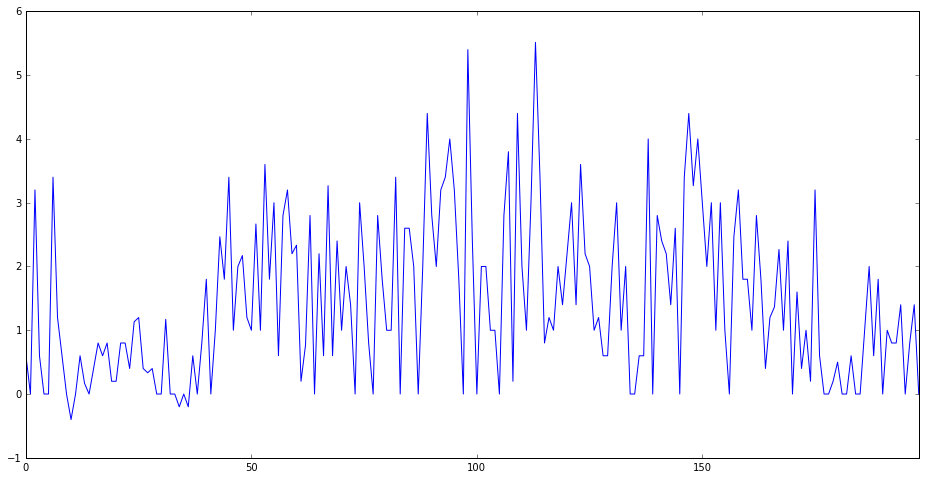

In [21]:
ts =  pd.Series(sentiments['Score']) # ,index=sentiments['Time'])
ts.plot(figsize=(16,8)) #area bar scatter